In [15]:
import ROOT
import tensorflow as tf
from tensorflow import keras
from root_numpy import root2array, rec2array, array2root, tree2array
from load_data import load_data
from sklearn.model_selection import train_test_split
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#create Train and test datasets
Trees = ['TreeQ','TreeG']
data = load_data('../data',Trees)
traindataset,valdataset = train_test_split(data,test_size=0.2,random_state=42)
trainData = copy.deepcopy(traindataset)
valData = copy.deepcopy(valdataset)

In [4]:
y_train,y_val = trainData['target'],valData['target']
X_train,X_val = trainData.drop('target',axis=1),valData.drop('target',axis=1)
#y_train,y_val = y_train.drop['JetPt'],y_val.drop['JetPt']
X_train,X_val = X_train.drop('JetPt',axis=1),X_val.drop('JetPt',axis=1)

In [5]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_val_np = X_val.to_numpy()
y_val_np = y_val.to_numpy()

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[2]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [18]:
X_train_np = X_train_np.astype('float64')
X_val_np = X_val_np.astype('float64')
y_train_np = y_train_np.astype('float64')
y_val_np = y_val_np.astype('float64')

In [19]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [20]:
history = model.fit(X_train_np,y_train_np,epochs=30,validation_data=(X_val_np,y_val_np))

Train on 498814 samples, validate on 124704 samples
Epoch 1/30
498814/498814 [==============================] - 121s 242us/sample - loss: 0.4910 - accuracy: 0.7996 - val_loss: 0.4717 - val_accuracy: 0.8012
Epoch 2/30
498814/498814 [==============================] - 120s 241us/sample - loss: 0.4683 - accuracy: 0.7992 - val_loss: 0.4504 - val_accuracy: 0.8012
Epoch 3/30
498814/498814 [==============================] - 117s 234us/sample - loss: 0.4512 - accuracy: 0.7995 - val_loss: 0.4244 - val_accuracy: 0.8012
Epoch 4/30
498814/498814 [==============================] - 129s 259us/sample - loss: 0.4401 - accuracy: 0.7996 - val_loss: 0.4262 - val_accuracy: 0.8012
Epoch 5/30
498814/498814 [==============================] - 116s 233us/sample - loss: 0.4316 - accuracy: 0.7996 - val_loss: 0.4299 - val_accuracy: 0.8012
Epoch 6/30
498814/498814 [==============================] - 119s 238us/sample - loss: 0.4269 - accuracy: 0.7996 - val_loss: 0.4104 - val_accuracy: 0.8012
Epoch 7/30
498814/498814

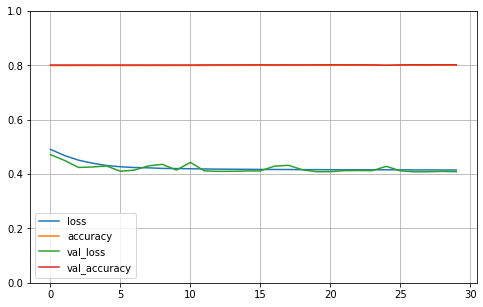

In [21]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()